# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
# Step:1 - Loading dataset
    
import pandas as pd

file_name = "CarPrice_Assignment.csv"

data = pd.read_csv(file_name)

data


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [2]:
data.describe() # an voerview of data

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [3]:
# Step:2

data.info() # shows there is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
# dataset is ok regading missing values, there are no missing ones

# using sklearn to encode the objetcs

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelencoder.fit_transform(data['enginelocation'])

In [5]:
data['doornumber'] = data['doornumber'].map({'two':2,'four':4})

In [6]:
data[0:10] # accessing 10 records to see hidden columns

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,1,0,2,3,1,0,99.8,...,136,0,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,1,0,4,3,1,0,105.8,...,136,0,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,1,0,4,4,1,0,105.8,...,136,0,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,1,1,4,3,1,0,105.8,...,131,0,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),1,1,2,2,0,0,99.5,...,131,0,3.13,3.40,7.0,160,5500,16,22,17859.167


In [7]:
data.info() # rechecking with info for objects which are carName, enginetype and cylindernumber. The last two
# are not much important

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null int64
drivewheel          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             

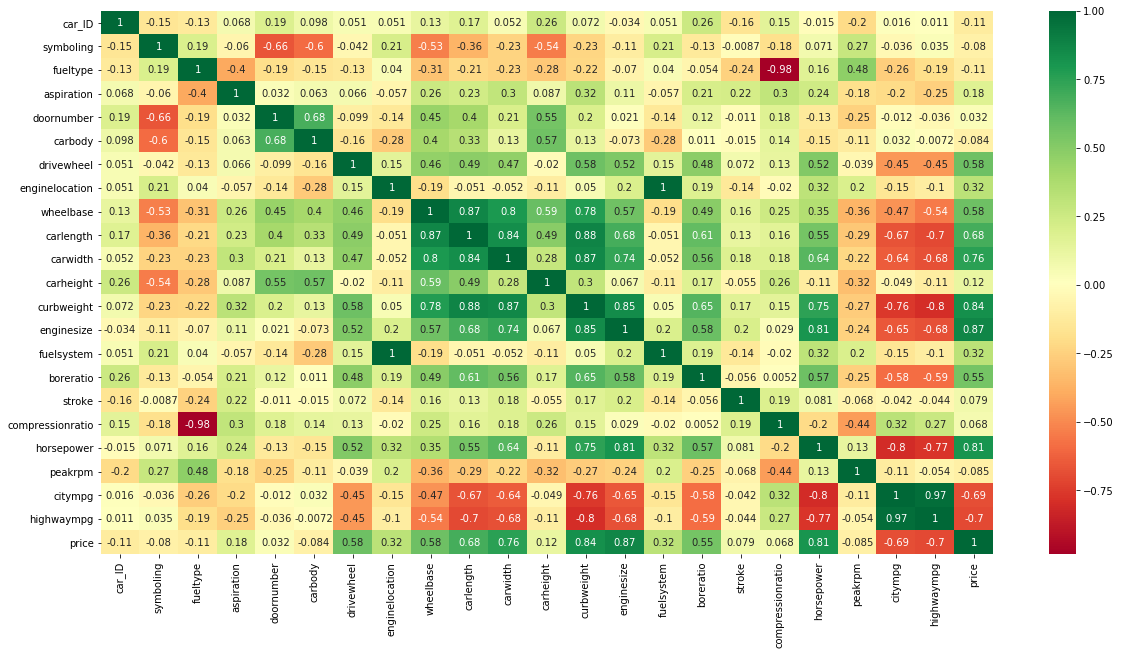

In [8]:
# analysis of features 
import matplotlib.pyplot as plt
import seaborn as sns

features_correlation = data.corr()
top_corr_features = features_correlation.index
plt.figure(figsize=(20,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
data1 = data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
              'wheelbase','drivewheel','price','enginelocation']]
data1.shape

(205, 10)

In [10]:
# Step:3
# Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
# 50% of 205 = 102.5 records              | 30% of 205 = 61.5 records |  20% of 205 = 41 records

from sklearn.model_selection import train_test_split
x = data1.loc[:, data1.columns != 'price']
y = data1.loc[:, data1.columns == 'price']

# ratios for the whole dataset.
train_ratio = 0.5
test_ratio = 0.3
validation_ratio = 0.2

# using train test split method
x_remaining, x_test, y_remaining, y_test = train_test_split(x, y, test_size=test_ratio)

# validation ratio from remaining dataset.
remaining = 1 - test_ratio
validation_adjusted = validation_ratio / remaining

# train and validation splits
x_train, x_validation, y_train, y_validation = train_test_split(x_remaining, y_remaining, test_size=validation_adjusted)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_validation.shape, y_validation.shape)


(102, 9) (102, 1) (62, 9) (62, 1) (41, 9) (41, 1)


In [12]:
# Steps 4 to 7

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import *


model = Sequential()
tf.keras.backend.set_floatx('float64')
model.add(tf.keras.layers.Dense(24, activation='relu'))
model.add(tf.keras.layers.Dense(1,))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.fit(x_train, y_train, epochs=200, validation_data =(x_validation, y_validation))

Epoch 1/200
4/4 [==============================] - 0s 40ms/step - loss: 264613542.2745 - mae: 14256.2851 - val_loss: 312313511.0244 - val_mae: 14954.1879
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 260839109.9608 - mae: 14137.6464 - val_loss: 309428008.9756 - val_mae: 14868.1270
Epoch 3/200
4/4 [==============================] - 0s 11ms/step - loss: 258294890.9804 - mae: 14053.4694 - val_loss: 306956968.3902 - val_mae: 14794.0639
Epoch 4/200
4/4 [==============================] - 0s 12ms/step - loss: 256035252.0784 - mae: 13980.7838 - val_loss: 304685864.5854 - val_mae: 14725.6892
Epoch 5/200
4/4 [==============================] - 0s 12ms/step - loss: 253960490.6667 - mae: 13912.0710 - val_loss: 302518472.5854 - val_mae: 14660.1558
Epoch 6/200
4/4 [==============================] - ETA: 0s - loss: 317124416.0000 - mae: 15094.878 - 0s 12ms/step - loss: 251932105.4118 - mae: 13847.6091 - val_loss: 300067368.1951 - val_mae: 14585.7396
Epoch 7/200
4/4 [=========

4/4 [==============================] - 0s 14ms/step - loss: 167438188.8627 - mae: 10732.2121 - val_loss: 208869071.8049 - val_mae: 11506.2412
Epoch 54/200
4/4 [==============================] - 0s 12ms/step - loss: 165718455.8431 - mae: 10660.8674 - val_loss: 206828210.1463 - val_mae: 11428.6734
Epoch 55/200
4/4 [==============================] - 0s 11ms/step - loss: 163893740.2353 - mae: 10581.5622 - val_loss: 204967427.9024 - val_mae: 11357.4981
Epoch 56/200
4/4 [==============================] - 0s 11ms/step - loss: 162220688.7843 - mae: 10510.1819 - val_loss: 203249662.6341 - val_mae: 11291.4288
Epoch 57/200
4/4 [==============================] - 0s 10ms/step - loss: 160640383.2157 - mae: 10441.8784 - val_loss: 201494049.5610 - val_mae: 11223.5370
Epoch 58/200
4/4 [==============================] - 0s 11ms/step - loss: 159010450.8235 - mae: 10373.3650 - val_loss: 199408859.3171 - val_mae: 11142.4304
Epoch 59/200
4/4 [==============================] - 0s 10ms/step - loss: 157154679.

4/4 [==============================] - 0s 11ms/step - loss: 79190890.5882 - mae: 6111.6176 - val_loss: 109550273.7561 - val_mae: 6920.5918
Epoch 107/200
4/4 [==============================] - 0s 11ms/step - loss: 77729261.0196 - mae: 6013.8217 - val_loss: 107735051.3171 - val_mae: 6821.6020
Epoch 108/200
4/4 [==============================] - 0s 11ms/step - loss: 76218704.7843 - mae: 5902.0595 - val_loss: 106181286.0488 - val_mae: 6737.3043
Epoch 109/200
4/4 [==============================] - 0s 10ms/step - loss: 74879850.5882 - mae: 5810.3349 - val_loss: 104517367.7561 - val_mae: 6645.8856
Epoch 110/200
4/4 [==============================] - 0s 11ms/step - loss: 73462413.0196 - mae: 5711.2869 - val_loss: 102728809.9024 - val_mae: 6546.2374
Epoch 111/200
4/4 [==============================] - 0s 11ms/step - loss: 72001073.3333 - mae: 5604.1558 - val_loss: 101096560.1463 - val_mae: 6453.9638
Epoch 112/200
4/4 [==============================] - 0s 11ms/step - loss: 70620131.1961 - mae: 5

Epoch 160/200
4/4 [==============================] - 0s 15ms/step - loss: 32143390.7255 - mae: 3808.6712 - val_loss: 49367127.8049 - val_mae: 5049.0164
Epoch 161/200
4/4 [==============================] - 0s 13ms/step - loss: 31975997.0882 - mae: 3810.7405 - val_loss: 49117083.5488 - val_mae: 5048.9614
Epoch 162/200
4/4 [==============================] - 0s 14ms/step - loss: 31878052.2353 - mae: 3815.0829 - val_loss: 48426650.7195 - val_mae: 5049.4430
Epoch 163/200
4/4 [==============================] - 0s 13ms/step - loss: 31546946.3627 - mae: 3837.3193 - val_loss: 48297400.4024 - val_mae: 5049.3692
Epoch 164/200
4/4 [==============================] - 0s 14ms/step - loss: 31482558.4314 - mae: 3835.1620 - val_loss: 47731840.2927 - val_mae: 5049.8496
Epoch 165/200
4/4 [==============================] - 0s 15ms/step - loss: 31298139.7647 - mae: 3863.1733 - val_loss: 47686790.7805 - val_mae: 5049.6656
Epoch 166/200
4/4 [==============================] - 0s 14ms/step - loss: 31244259.3725 

# Steps 8 & 9

# Evaluation using test values

In [13]:
results = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 33189314.4516 - mae: 4220.7932


# Evaluation using validation values

In [13]:
validation = model.evaluate(x_validation, y_validation)

2/2 [==============================] - 0s 1ms/step - loss: 71133480.0000 - mae: 5167.6118


# Predictions

In [14]:
model.predict(x_test[0:5])

array([[15180.83413238],
       [10735.89921633],
       [12320.97362972],
       [11085.55229633],
       [16202.66913508]])

In [15]:
val = model.predict(x_validation)

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
print(mean_absolute_error(y_validation, val))

5125.252257180944
